In [72]:
import warnings 
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [73]:
df_ad=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')

In [74]:
df_ad.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [75]:

df_ad.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [76]:

df_ad.rename(columns = {'Unnamed: 0':'ID'}, inplace = True)

In [77]:
df_ad.head()

,ID,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [78]:
df_Sale=df_ad.drop("ID",axis=1)

In [79]:

df_Sale.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [80]:
df_Sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [81]:

df_Sale.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [82]:
df_Sale['TV'].value_counts()

199.8    2
109.8    2
17.2     2
177.0    2
222.4    2
        ..
139.3    1
216.8    1
199.1    1
26.8     1
232.1    1
Name: TV, Length: 190, dtype: int64

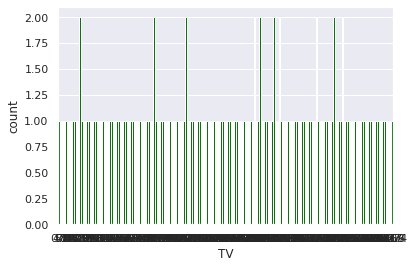

In [83]:

 
# illustrate count plots
sns.countplot(x='TV',data=df_Sale,color='green')

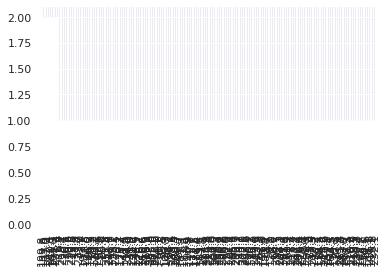

In [84]:
df_Sale['TV'].value_counts().plot.bar()
plt.show()

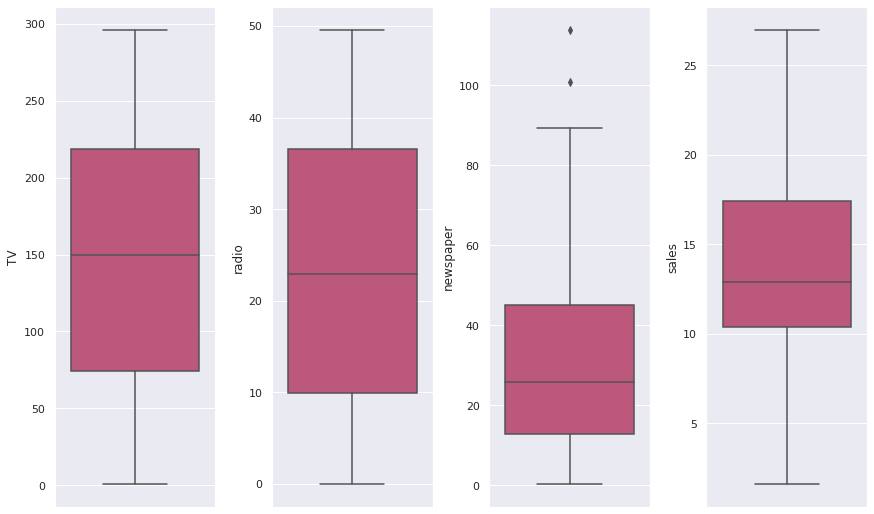

In [85]:

fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(12,7))
index = 0
ax = ax.flatten()
for col, value in df_Sale.items():
    sns.boxplot(y=col, data=df_Sale, ax=ax[index], palette="plasma")
    index += 1
plt.tight_layout(pad=0.2, w_pad=0.9, h_pad=5.0)
plt.show()

<Figure size 1080x720 with 0 Axes>

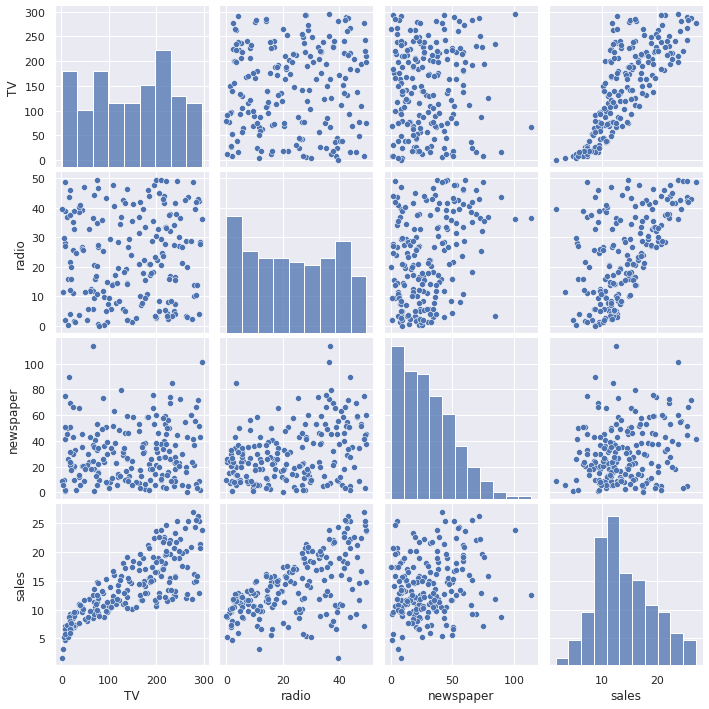

In [86]:
plt.figure(figsize=(15,10))
sns.pairplot(df_Sale)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa361e00350>,
      dtype=object)

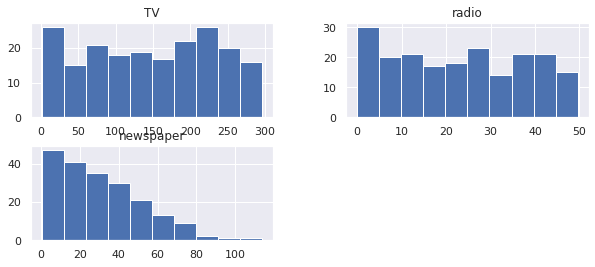

In [87]:

features = ['TV', 'radio','newspaper']
df_Sale[features].hist(figsize=(10, 4))

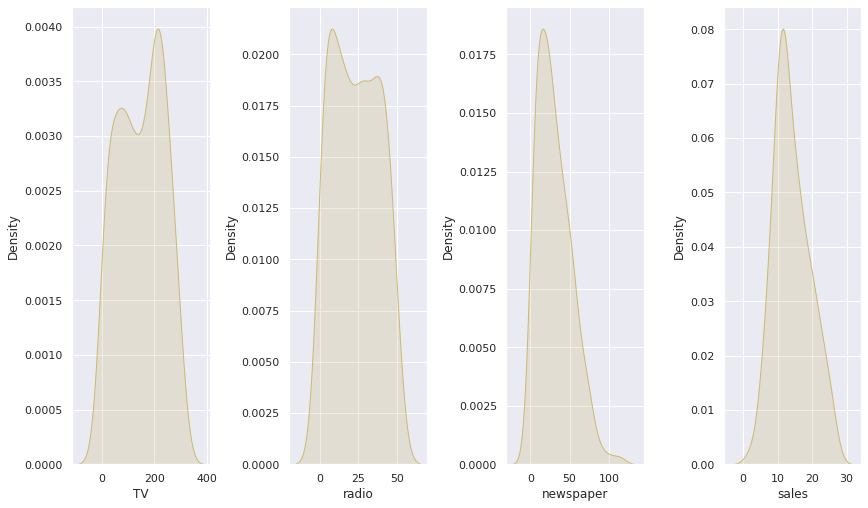

In [88]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(12,7))
index = 0
ax = ax.flatten()
for col, value in df_Sale.items():
    sns.distplot(value, ax=ax[index], hist=False, color="y", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

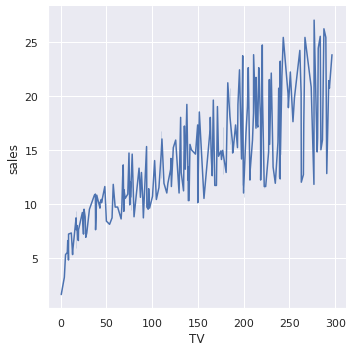

In [89]:

sns.relplot(x="TV", y="sales", kind="line", data=df_Sale)

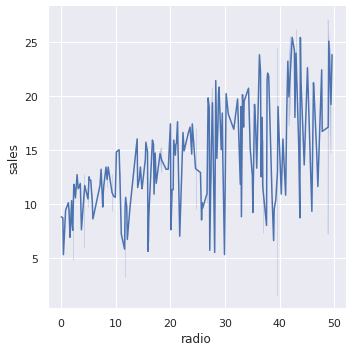

In [90]:

sns.relplot(x="radio", y="sales", kind="line", data=df_Sale)

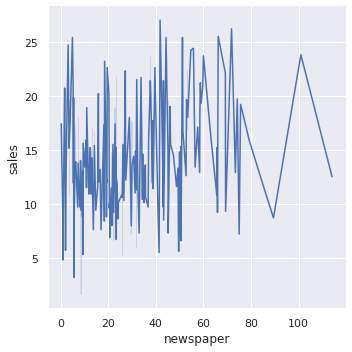

In [91]:
sns.relplot(x="newspaper", y="sales", kind="line", data=df_Sale)

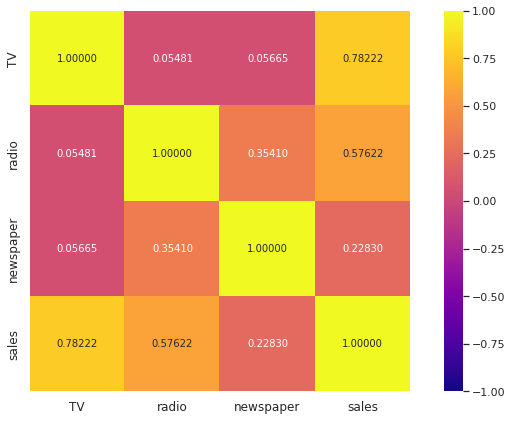

In [92]:
lower_triangle = np.tril(df_Sale.corr())
plt.figure(figsize=(12,7))
sns.heatmap(df_Sale.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.5f', 
            annot_kws={'size':10}, cmap="plasma")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [93]:

X = df_Sale.drop('sales', axis=1)
Y = df_Sale['sales']

In [94]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X # Displaying all the features after applying scaling technique to avoid bias output

,TV,radio,newspaper
0,0.969852,0.981522,1.778945
1,-1.197376,1.082808,0.669579
2,-1.516155,1.528463,1.783549
3,0.052050,1.217855,1.286405
4,0.394182,-0.841614,1.281802
...,...,...,...
195,-1.270941,-1.321031,-0.771217
196,-0.617035,-1.240003,-1.033598
197,0.349810,-0.942899,-1.111852
198,1.594565,1.265121,1.640850


In [95]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

In [96]:

# Regression Model Function

def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

In [97]:
# Linear Regression Model

model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 1.6611334844530612
R2 Score is: 92.20737408493859
Cross Validation Score: 88.71063495438435
R2 Score - Cross Validation Score is 3.4967391305542463


In [98]:

# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is: 3.6048001995986403
R2 Score is: 63.30244246991666
Cross Validation Score: 72.20715307684598
R2 Score - Cross Validation Score is -8.90471060692932


In [99]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X, Y)

RMSE Score is: 3.456407094079052
R2 Score is: 66.26159565701089
Cross Validation Score: 62.652074809515156
R2 Score - Cross Validation Score is 3.6095208474957303


In [100]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 3.4375283236536975
R2 Score is: 66.62914502392735
Cross Validation Score: 61.05229272858346
R2 Score - Cross Validation Score is 5.57685229534389


In [101]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

RMSE Score is: 3.3914518160686886
R2 Score is: 67.51775291731266
Cross Validation Score: 62.79670505385071
R2 Score - Cross Validation Score is 4.721047863461955


In [102]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE Score is: 1.0516445943629158
R2 Score is: 96.8767068350603
Cross Validation Score: 93.28367083816225
R2 Score - Cross Validation Score is 3.5930359968980525


In [103]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE Score is: 1.163231503781359
R2 Score is: 96.17873572196949
Cross Validation Score: 95.86007140956852
R2 Score - Cross Validation Score is 0.31866431240096915


In [104]:

# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE Score is: 1.4738105435825213
R2 Score is: 93.86579788516323
Cross Validation Score: 93.19691227725876
R2 Score - Cross Validation Score is 0.6688856079044712


In [105]:

# Choosing Ada Boost Regressor

fmod_param = {'n_estimators' : [50, 100, 150, 200],
              'learning_rate' : [0.001, 0.01, 0.1, 1],
              'loss' : ["linear", "square", "exponential"],
              'random_state' : [21, 42, 104, 111]
             }

In [106]:
GSCV = GridSearchCV(AdaBoostRegressor(), fmod_param, cv=5)

In [107]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100, 150, 200],
                         'random_state': [21, 42, 104, 111]})

In [108]:
GSCV.best_params_

{'learning_rate': 1,
 'loss': 'linear',
 'n_estimators': 150,
 'random_state': 111}

In [109]:
Final_Model = AdaBoostRegressor(learning_rate=1, loss="linear", n_estimators=150, random_state=111)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred, multioutput='variance_weighted')*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 96.18348660788863
